## 텐서(원소별 계산)

In [1]:
import sys
sys.path.append('..')

In [2]:
import numpy as np
import myPackage.functions as F
from myPackage import Variable

__file__ in globals at layers.py
__file__ in globals at utils.py
__file__ in globals at models.py


In [4]:
x = Variable(np.array(1.))
y = F.sin(x)
print(y)

variable(0.8414709848078965)


In [4]:
temp = np.array([[1, 2, 3], [4, 5, 6]])
x = Variable(temp)
y = F.sin(x)
print(y)

variable([[ 0.84147098  0.90929743  0.14112001]
          [-0.7568025  -0.95892427 -0.2794155 ]]) from class's __repr__


In [3]:
temp1 = np.array([[1, 2, 3], [4, 5, 6]])
temp2 = np.array([[10, 20, 30], [40, 50, 60]])
x = Variable(temp1)
c = Variable(temp2)
y = x + c
print(y)

variable([[11 22 33]
          [44 55 66]]) from class's __repr__


## 텐서 + 역전파
### 39장의 합계 함수가 포함된 장으로, sum 함수가 정의된 다음 다음의 코드블럭들을 실행할 수 있음

In [4]:
x = Variable(temp1)
c = Variable(temp2)
t = x + c
y = F.sum(t)
print(y)

variable(231) from class's __repr__


In [5]:
y.backward(retain_grad=True)
print(y.grad) # Variable(1)
print(t.grad) # Variable([[1 1 1], [1 1 1]])
print(x.grad) # Variable([[1 1 1], [1 1 1]])
print(c.grad) # Variable([[1 1 1], [1 1 1]])

variable(1) from class's __repr__
variable([[1 1 1]
          [1 1 1]]) from class's __repr__
variable([[1 1 1]
          [1 1 1]]) from class's __repr__
variable([[1 1 1]
          [1 1 1]]) from class's __repr__


## myPackage.functions에 정의된 reshape 함수 사용

In [ ]:
# myPackage.functions에 update된 클래스
class Reshape(Function):
    """
    Reshape Class

    Methods
    -------
    __inif__ : Get parameter(shape) means ndarray.shape and save that.
    forward : Work forward propagation with parameter(x) is Variable class's instance. This methods's goal is save the x's shape and change the shape by self.shape.
    backward : Work backward propagation with parameter(gy) is Variable class's instance (come from previous layer having Function.outputs.grad).
    """
    def __init__(self, shape):
        self.shape = shape

    def forward(self, x):
        self.x_shape = x.shape
        y = x.reshape(self.shape)
        return y

    def backward(self, gy):
        return reshape(gy, self.x_shape)

def reshape(x, shape):
    """
    Def reshape

    Explanation
    -----------
    Get parameter(shape) is ndarray.shape and reshape parameter(x)'s shape from parameter(shape).
    """
    if x.shape == shape:
        return as_variable(x)
    return Reshape(shape)(x)

In [6]:
import numpy as np
import myPackage.functions as F
from myPackage import Variable

In [7]:
temp = np.arange(1, 7).reshape(2, 3)
x = Variable(temp)
y = F.reshape(x, (6,))
y.backward(retain_grad=True)
print(x.grad)

variable([[1 1 1]
          [1 1 1]]) from class's __repr__


## Variable에서 reshape 사용하기

In [9]:
# np.reshape 사용 방식
x = np.random.rand(1, 2, 3) # x.shape = (1, 2, 3)
print(x)

y1 = x.reshape((2, 3)) # tuple
print(y1)
y2 = x.reshape([2, 3]) # list
print(y2)
y3 = x.reshape(2, 3) # row, col
print(y3)

[[[0.29796314 0.46905022 0.5587009 ]
  [0.35107913 0.95100032 0.35477522]]]
[[0.29796314 0.46905022 0.5587009 ]
 [0.35107913 0.95100032 0.35477522]]
[[0.29796314 0.46905022 0.5587009 ]
 [0.35107913 0.95100032 0.35477522]]
[[0.29796314 0.46905022 0.5587009 ]
 [0.35107913 0.95100032 0.35477522]]


In [ ]:
import myPackage # update

class Variable:
    """ Update Version (Level 4-1).
    Class Variable : np.array 값을 다루되 다른 멤버변수를 추가적인 특징으로 가져 다양한 정보를 모두 포함시키는 클래스.

    Parameter
    ---------
    data : np.array
        실제 연산에서 사용되는 값으로, 다양한 연산 및 정보 전달에도 사용
    grad : int, float
        역전파 수행 시, 현재 역전파 층에서의 gradient 값을 저장하여 다음 역전파에 전달하는 기능을 수행
    creator : callable function
        Variable 객체(인스턴스)를 연산하기 위한 함수가 무엇인지 저장하여 현재 객체는 creator에 들어온 함수값을 수행하기 위해 존재하는 것으로 판단하면 됨
    generation : Variable 객체가 어느 세대(generation)에 포함되어 있는지를 표현하기 위한 변수

    Functions
    ---------
    # 재귀 방식과 반복문 방식의 경우 메모리 할당 측면에서 반복문 방식이 유리하다.
    # 재귀 방식은 호출 시마다 메모리에 누적되나 반복문의 경우 pop을 활용해 메모리가 누적되지 않은 상태로 작업을 수월한다.
    __init__
        isinstance : 첫 번째 파라미터값의 타입과 두 번째 파라미터값의 동등 여부를 확인하는 함수
        retain_grad : gradient 값(y().grad)을 유지시킬지 설정하는 변수. default = False
        name : 차후 Variable에 이름을 달아주기 위해 설정
    cleargrad
        메모리 절약을 위해서 한 번 할당했던 변수를 또 다시 사용해야 할 경우 기존 메모리에 있던 Variable.grad 정보가 남아있기 때문에 할당을 해제해주어야 제대로 동작을 수행하게 된다.
    backward
        반복문을 이용한 역전파 코드
        while loop 내에서 zip 함수를 활용하여 x.grad에 중복되게 값이 들어갈 경우 기존 노드에 더해지도록 만들어 x + x = 2x 라는 식을 예로 들었을 때, gradient 값이 2로 정상 출력되게 하였음
        add_func
            역전파 시 함수가 pop되면서 새로운 값이 들어올 때, 같은 메모리를 참조하는 경우에 중복 방지를 위해서 추가된 함수
            이미지 결과를 보면 더 이해가 쉽기 때문에 아래 코드블럭 중 Check로 Markdown 표시를 한 곳에서 이미지를 확인하기를 추천!!!
        weakref
            순환 참조로 인해 생기는 메모리 누수 문제를 해결하기 위해 import된 weakref 객체에 대해 실제로 값을 출력할 때는 Variable처럼 weakref도 어떠한 기본 데이터타입을 감싸고 있는 형태이므로 기본 생성자를 통해 객체를 호출함과 동시에 output을 사용해 실제 결과값을 확인함
        self.grad. 즉 역전파 시작 시 기존에는 ndarray 인스턴스를 받았으나 고차 미분을 가능하게 하기 위해 ndarray 인스턴스가 아닌 Variable 인스턴스를 받도록 설정
        입력 파라미터에 create_graph 변수 추가. 역전파 1회 계산 후 역전파를 비활성 모드로 실행하게 만드는 파라미터
        with using_config(name, value) 구문을 생성하여 역전파 설정을 통해 들여쓰기된 구문의 수행 여부를 판단
    shape, ndim, size, dtype : numpy에 기본적으로 내장되어있는 메서드를 @property 데코레이터를 활용하여 바로 호출할 수 있도록 설정
    __len__ : data의 길이 반환
    __repr__ : print로 객체를 표현할 때 return할 값을 설정
    __mul__ : 다른 객체 또는 데이터타입과의 multiply 기능 지원
    >> Update
        reshape(self, *shape) : 만약에 가변인자로 들어오는 shape 값이 1개인 경우 그 값의 instance가 tuple or list일 때 shape[0]를 shape로 지정하고 그 외의 경우에는 myPackage.functions.reshape 함수를 사용하여 *shape의 값을 그대로 반영하여 reshape 진행
    """
    def __init__(self, data, name = None):
        if data is not None:
            if not isinstance(data, np.ndarray):
                raise TypeError(f'{type(data)} is not supported.')

        self.data = data
        self.name = name
        self.grad = None
        self.creator = None
        self.generation = 0

    def cleargrad(self):
        self.grad = None

    def set_creator(self, func):
        self.creator = func
        self.generation = func.generation + 1

    @property
    def shape(self):
        return self.data.shape

    @property
    def ndim(self):
        return self.data.ndim

    @property
    def size(self):
        return self.data.size

    @property
    def dtype(self):
        return self.data.dtype

    def __len__(self):
        return len(self.data)

    def __repr__(self):
        if self.data is None:
            return "variable(None)"
        p = str(self.data).replace('\n', '\n' + ' ' * 9)
        return f"variable({p}) from class's __repr__"

    def reshape(self, *shape):
        if len(shape) == 1 and isinstance(shape[0], (tuple, list)):
            shape = shape[0]
        return myPackage.functions.reshape(self, shape)

    def backward(self, retain_grad = False, create_graph = False):
        if self.grad is None:
            self.grad = Variable(np.ones_like(self.data))

        funcs = []
        seen_set = set()

        def add_func(f):
            if f not in seen_set:
                funcs.append(f)
                seen_set.add(f)
                funcs.sort(key = lambda x: x.generation)

        add_func(self.creator)

        while funcs:
            f = funcs.pop()
            gys = [output().grad for output in f.outputs]

            with using_config('enable_backprop', create_graph):
                gxs = f.backward(*gys)
                if not isinstance(gxs, tuple):
                    gxs = (gxs,)

                for x, gx in zip(f.inputs, gxs):
                    if x.grad is None:
                        x.grad = gx
                    else:
                        x.grad = x.grad + gx

                    if x.creator is not None:
                        add_func(x.creator)
            
            if not retain_grad:
                for y in f.outputs:
                    y().grad = None

In [3]:
x = Variable(np.random.randn(1, 2, 3))
y = x.reshape((2, 3))
y = x.reshape(2, 3)

In [4]:
y

variable([[-0.70855515  1.5145279  -0.25885624]
          [ 0.71299628 -0.5526742   0.37114441]]) from class's __repr__

## 행렬의 전치

In [5]:
# numpy 예제
x = np.array(np.arange(1, 7).reshape(2, 3))
y = np.transpose(x)
print(y)

[[1 4]
 [2 5]
 [3 6]]


In [ ]:
# myPackage.functions에 update된 중간 단계의 Transpose 클래스
class Transpose(Function):
    def forward(self, x):
        y = np.transpose(x)
        return y

    def backward(self, gy):
        gx = transpose(gy)
        return gx

def transpose(x):
    return Transpose()(x)

In [3]:
temp = np.arange(1, 7).reshape(2, 3)
x = Variable(temp)
y = F.transpose(x)
y.backward()
print(x.grad)

variable([[1 1 1]
          [1 1 1]]) from class's __repr__


In [ ]:
class Variable:
    """ Update Version (Level 4-2).
    Class Variable : np.array 값을 다루되 다른 멤버변수를 추가적인 특징으로 가져 다양한 정보를 모두 포함시키는 클래스.

    Parameter
    ---------
    data : np.array
        실제 연산에서 사용되는 값으로, 다양한 연산 및 정보 전달에도 사용
    grad : int, float
        역전파 수행 시, 현재 역전파 층에서의 gradient 값을 저장하여 다음 역전파에 전달하는 기능을 수행
    creator : callable function
        Variable 객체(인스턴스)를 연산하기 위한 함수가 무엇인지 저장하여 현재 객체는 creator에 들어온 함수값을 수행하기 위해 존재하는 것으로 판단하면 됨
    generation : Variable 객체가 어느 세대(generation)에 포함되어 있는지를 표현하기 위한 변수

    Functions
    ---------
    # 재귀 방식과 반복문 방식의 경우 메모리 할당 측면에서 반복문 방식이 유리하다.
    # 재귀 방식은 호출 시마다 메모리에 누적되나 반복문의 경우 pop을 활용해 메모리가 누적되지 않은 상태로 작업을 수월한다.
    __init__
        isinstance : 첫 번째 파라미터값의 타입과 두 번째 파라미터값의 동등 여부를 확인하는 함수
        retain_grad : gradient 값(y().grad)을 유지시킬지 설정하는 변수. default = False
        name : 차후 Variable에 이름을 달아주기 위해 설정
    cleargrad
        메모리 절약을 위해서 한 번 할당했던 변수를 또 다시 사용해야 할 경우 기존 메모리에 있던 Variable.grad 정보가 남아있기 때문에 할당을 해제해주어야 제대로 동작을 수행하게 된다.
    backward
        반복문을 이용한 역전파 코드
        while loop 내에서 zip 함수를 활용하여 x.grad에 중복되게 값이 들어갈 경우 기존 노드에 더해지도록 만들어 x + x = 2x 라는 식을 예로 들었을 때, gradient 값이 2로 정상 출력되게 하였음
        add_func
            역전파 시 함수가 pop되면서 새로운 값이 들어올 때, 같은 메모리를 참조하는 경우에 중복 방지를 위해서 추가된 함수
            이미지 결과를 보면 더 이해가 쉽기 때문에 아래 코드블럭 중 Check로 Markdown 표시를 한 곳에서 이미지를 확인하기를 추천!!!
        weakref
            순환 참조로 인해 생기는 메모리 누수 문제를 해결하기 위해 import된 weakref 객체에 대해 실제로 값을 출력할 때는 Variable처럼 weakref도 어떠한 기본 데이터타입을 감싸고 있는 형태이므로 기본 생성자를 통해 객체를 호출함과 동시에 output을 사용해 실제 결과값을 확인함
        self.grad. 즉 역전파 시작 시 기존에는 ndarray 인스턴스를 받았으나 고차 미분을 가능하게 하기 위해 ndarray 인스턴스가 아닌 Variable 인스턴스를 받도록 설정
        입력 파라미터에 create_graph 변수 추가. 역전파 1회 계산 후 역전파를 비활성 모드로 실행하게 만드는 파라미터
        with using_config(name, value) 구문을 생성하여 역전파 설정을 통해 들여쓰기된 구문의 수행 여부를 판단
    shape, ndim, size, dtype : numpy에 기본적으로 내장되어있는 메서드를 @property 데코레이터를 활용하여 바로 호출할 수 있도록 설정
    __len__ : data의 길이 반환
    __repr__ : print로 객체를 표현할 때 return할 값을 설정
    __mul__ : 다른 객체 또는 데이터타입과의 multiply 기능 지원
    reshape(self, *shape) : 만약에 가변인자로 들어오는 shape 값이 1개인 경우 그 값의 instance가 tuple or list일 때 shape[0]를 shape로 지정하고 그 외의 경우에는 myPackage.functions.reshape 함수를 사용하여 *shape의 값을 그대로 반영하여 reshape 진행
    >> Update
        transpose : Variable 인스턴스에서 transpose 메서드를 호출했을 때, myPackage.functions에서 transpose 함수를 바로 호출할 수 있도록 설정
        T : transpose를 바로 실행할 수 있도록 만든 @property function. @property 데코레이터를 사용하여 self 객체를 instance 변수로 바로 사용할 수 있도록 설정하였음
    """
    def __init__(self, data, name = None):
        if data is not None:
            if not isinstance(data, np.ndarray):
                raise TypeError(f'{type(data)} is not supported.')

        self.data = data
        self.name = name
        self.grad = None
        self.creator = None
        self.generation = 0

    def cleargrad(self):
        self.grad = None

    def set_creator(self, func):
        self.creator = func
        self.generation = func.generation + 1

    @property
    def shape(self):
        return self.data.shape

    @property
    def ndim(self):
        return self.data.ndim

    @property
    def size(self):
        return self.data.size

    @property
    def dtype(self):
        return self.data.dtype

    @property
    def T(self):
        return myPackage.functions.transpose(self)

    def __len__(self):
        return len(self.data)

    def __repr__(self):
        if self.data is None:
            return "variable(None)"
        p = str(self.data).replace('\n', '\n' + ' ' * 9)
        return f"variable({p}) from class's __repr__"

    def reshape(self, *shape):
        if len(shape) == 1 and isinstance(shape[0], (tuple, list)):
            shape = shape[0]
        return myPackage.functions.reshape(self, shape)

    def transpose(self):
        return myPackage.functions.transpose(self)

    def backward(self, retain_grad = False, create_graph = False):
        if self.grad is None:
            self.grad = Variable(np.ones_like(self.data))

        funcs = []
        seen_set = set()

        def add_func(f):
            if f not in seen_set:
                funcs.append(f)
                seen_set.add(f)
                funcs.sort(key = lambda x: x.generation)

        add_func(self.creator)

        while funcs:
            f = funcs.pop()
            gys = [output().grad for output in f.outputs]

            with using_config('enable_backprop', create_graph):
                gxs = f.backward(*gys)
                if not isinstance(gxs, tuple):
                    gxs = (gxs,)

                for x, gx in zip(f.inputs, gxs):
                    if x.grad is None:
                        x.grad = gx
                    else:
                        x.grad = x.grad + gx

                    if x.creator is not None:
                        add_func(x.creator)
            
            if not retain_grad:
                for y in f.outputs:
                    y().grad = None

## (보충) 실제 transpose 함수

In [ ]:
# 축의 데이터 순서 변경
A, B, C, D = 1, 2, 3, 4
x = np.random.rand(A, B, C, D)
y = x.transpose(1, 0, 3, 2)

In [ ]:
# myPackage.functions에 update된 최종 Trnaspose 클래스
class Transpose(Function):
    def __init__(self, axes=None):
        self.axes = axes

    def forward(self, x):
        y = x.transpose(self.axes)
        return y

    def backward(self, gy):
        if self.axes is None:
            return transpose(gy)
        
        axes_len = len(self.axes)
        inv_axes = tuple(np.argsort([ax % axes_len for ax in self.axes]))
        return transpose(gy, inv_axes)

def transpose(x, axes=None):
    return Transpose(axes)(x)

In [3]:
x = Variable(np.random.rand(2, 3))
y = x.transpose()
y = x.T

In [4]:
y

variable([[0.83565085 0.49163507]
          [0.66753849 0.44648439]
          [0.46673935 0.52092064]]) from class's __repr__

## 합계 함수

In [ ]:
class Sum(Function):
    def forward(self, x):
        self.x_shape = x.shape
        y = x.sum()
        return y

    def backward(self, gy):
        gx = broadcast_to(gy, self.x_shape)
        return gx

def sum(x):
    return Sum()(x)

### 40장의 합계 함수가 포함된 장으로, broadcast_to 함수가 정의된 다음 다음의 코드블럭들을 실행할 수 있음

In [6]:
# Case 1: vector
x = Variable(np.array([1, 2, 3, 4, 5, 6]))
y = F.sum(x)
y.backward()
print(y) # Variable(21)
print(x.grad) # Variable([1 1 1 1 1 1])

variable(21) from class's __repr__
variable([1 1 1 1 1 1]) from class's __repr__


In [7]:
# Case 2: matrix
x = Variable(np.array([[1, 2, 3], [4, 5, 6]]))
y = F.sum(x)
y.backward()
print(y) # Variable(21)
print(x.grad) # Variable([[1 1 1], [1 1 1]])

variable(21) from class's __repr__
variable([[1 1 1]
          [1 1 1]]) from class's __repr__


## axis, keepdims (in numpy.sum)

In [5]:
x = np.array([[1, 2, 3], [4, 5, 6]])
y = np.sum(x, axis = 0)
print(y)
print(x.shape, ' -> ', y.shape)

[5 7 9]
(2, 3)  ->  (3,)


In [8]:
x = np.array([[[1, 2, 3], [4, 5, 6], [7, 8, 9]]])
print(x.shape)
y = np.sum(x, axis = (0, 2))
print(y)
print(x.shape, ' -> ', y.shape)

(1, 3, 3)
[ 6 15 24]
(1, 3, 3)  ->  (3,)


In [9]:
x = np.array([[1, 2, 3], [4, 5, 6]])
y = np.sum(x, keepdims=True)
print(y)
print(y.shape)

[[21]]
(1, 1)


## 합계 클래스 및 함수(Sum, sum) 수정

In [ ]:
class Sum(Function):
    def __init__(self, axis, keepdims):
        self.axis = axis
        self.keepdims = keepdims

    def forward(self, x):
        self.x_shape = x.shape
        y = x.sum(axis=self.axis, keepdims=self.keepdims)
        return y

    def backward(self, gy):
        gy = utils.reshape_sum_backward(gy, self.x_shape, self.axis, self.keepdims)
        gx = broadcast_to(gy, self.x_shape)
        return gx

def sum(x, axis=None, keepdims=False):
    return Sum(axis, keepdims)(x)

In [ ]:
# myPackage.utils.py에 update된 function

def reshape_sum_backward(gy, x_shape, axis, keepdims):
    """Reshape gradient appropriately for myPackage.functions.sum's backward.
    Args:
        gy (myPackage.Variable): Gradient variable from the output by backprop.
        x_shape (tuple): Shape used at sum function's forward.
        axis (None or int or tuple of ints): Axis used at sum function's
            forward.
        keepdims (bool): Keepdims used at sum function's forward.
    Returns:
        myPackage.Variable: Gradient variable which is reshaped appropriately
    """
    ndim = len(x_shape)
    tupled_axis = axis
    if axis is None:
        tupled_axis = None
    elif not isinstance(axis, tuple):
        tupled_axis = (axis,)

    if not (ndim == 0 or tupled_axis is None or keepdims):
        actual_axis = [a if a >= 0 else a + ndim for a in tupled_axis]
        shape = list(gy.shape)
        for a in sorted(actual_axis):
            shape.insert(a, 1)
    else:
        shape = gy.shape

    gy = gy.reshape(shape)  # reshape
    return gy

In [ ]:
class Variable:
    """ Update Version (Level 4-3).
    Class Variable : np.array 값을 다루되 다른 멤버변수를 추가적인 특징으로 가져 다양한 정보를 모두 포함시키는 클래스.

    Parameter
    ---------
    data : np.array
        실제 연산에서 사용되는 값으로, 다양한 연산 및 정보 전달에도 사용
    grad : int, float
        역전파 수행 시, 현재 역전파 층에서의 gradient 값을 저장하여 다음 역전파에 전달하는 기능을 수행
    creator : callable function
        Variable 객체(인스턴스)를 연산하기 위한 함수가 무엇인지 저장하여 현재 객체는 creator에 들어온 함수값을 수행하기 위해 존재하는 것으로 판단하면 됨
    generation : Variable 객체가 어느 세대(generation)에 포함되어 있는지를 표현하기 위한 변수

    Functions
    ---------
    # 재귀 방식과 반복문 방식의 경우 메모리 할당 측면에서 반복문 방식이 유리하다.
    # 재귀 방식은 호출 시마다 메모리에 누적되나 반복문의 경우 pop을 활용해 메모리가 누적되지 않은 상태로 작업을 수월한다.
    __init__
        isinstance : 첫 번째 파라미터값의 타입과 두 번째 파라미터값의 동등 여부를 확인하는 함수
        retain_grad : gradient 값(y().grad)을 유지시킬지 설정하는 변수. default = False
        name : 차후 Variable에 이름을 달아주기 위해 설정
    cleargrad
        메모리 절약을 위해서 한 번 할당했던 변수를 또 다시 사용해야 할 경우 기존 메모리에 있던 Variable.grad 정보가 남아있기 때문에 할당을 해제해주어야 제대로 동작을 수행하게 된다.
    backward
        반복문을 이용한 역전파 코드
        while loop 내에서 zip 함수를 활용하여 x.grad에 중복되게 값이 들어갈 경우 기존 노드에 더해지도록 만들어 x + x = 2x 라는 식을 예로 들었을 때, gradient 값이 2로 정상 출력되게 하였음
        add_func
            역전파 시 함수가 pop되면서 새로운 값이 들어올 때, 같은 메모리를 참조하는 경우에 중복 방지를 위해서 추가된 함수
            이미지 결과를 보면 더 이해가 쉽기 때문에 아래 코드블럭 중 Check로 Markdown 표시를 한 곳에서 이미지를 확인하기를 추천!!!
        weakref
            순환 참조로 인해 생기는 메모리 누수 문제를 해결하기 위해 import된 weakref 객체에 대해 실제로 값을 출력할 때는 Variable처럼 weakref도 어떠한 기본 데이터타입을 감싸고 있는 형태이므로 기본 생성자를 통해 객체를 호출함과 동시에 output을 사용해 실제 결과값을 확인함
        self.grad. 즉 역전파 시작 시 기존에는 ndarray 인스턴스를 받았으나 고차 미분을 가능하게 하기 위해 ndarray 인스턴스가 아닌 Variable 인스턴스를 받도록 설정
        입력 파라미터에 create_graph 변수 추가. 역전파 1회 계산 후 역전파를 비활성 모드로 실행하게 만드는 파라미터
        with using_config(name, value) 구문을 생성하여 역전파 설정을 통해 들여쓰기된 구문의 수행 여부를 판단
    shape, ndim, size, dtype : numpy에 기본적으로 내장되어있는 메서드를 @property 데코레이터를 활용하여 바로 호출할 수 있도록 설정
    __len__ : data의 길이 반환
    __repr__ : print로 객체를 표현할 때 return할 값을 설정
    __mul__ : 다른 객체 또는 데이터타입과의 multiply 기능 지원
    reshape(self, *shape) : 만약에 가변인자로 들어오는 shape 값이 1개인 경우 그 값의 instance가 tuple or list일 때 shape[0]를 shape로 지정하고 그 외의 경우에는 myPackage.functions.reshape 함수를 사용하여 *shape의 값을 그대로 반영하여 reshape 진행
    transpose : Variable 인스턴스에서 transpose 메서드를 호출했을 때, myPackage.functions에서 transpose 함수를 바로 호출할 수 있도록 설정
    T : transpose를 바로 실행할 수 있도록 만든 @property function. @property 데코레이터를 사용하여 self 객체를 instance 변수로 바로 사용할 수 있도록 설정하였음
    >> Update
        sum : myPackage.functions.sum 함수를 호출하여 Variable 인스턴스에서 바로 sum 함수를 호출할 수 있도록 설정
    """
    def __init__(self, data, name = None):
        if data is not None:
            if not isinstance(data, np.ndarray):
                raise TypeError(f'{type(data)} is not supported.')

        self.data = data
        self.name = name
        self.grad = None
        self.creator = None
        self.generation = 0

    def cleargrad(self):
        self.grad = None

    def set_creator(self, func):
        self.creator = func
        self.generation = func.generation + 1

    @property
    def shape(self):
        return self.data.shape

    @property
    def ndim(self):
        return self.data.ndim

    @property
    def size(self):
        return self.data.size

    @property
    def dtype(self):
        return self.data.dtype

    @property
    def T(self):
        return myPackage.functions.transpose(self)

    def __len__(self):
        return len(self.data)

    def __repr__(self):
        if self.data is None:
            return "variable(None)"
        p = str(self.data).replace('\n', '\n' + ' ' * 9)
        return f"variable({p}) from class's __repr__"

    def reshape(self, *shape):
        if len(shape) == 1 and isinstance(shape[0], (tuple, list)):
            shape = shape[0]
        return myPackage.functions.reshape(self, shape)

    def transpose(self):
        return myPackage.functions.transpose(self)

    def sum(self, axis=None, keepdims=False):
        return myPackage.functions.sum(self, axis, keepdims)

    def backward(self, retain_grad = False, create_graph = False):
        if self.grad is None:
            self.grad = Variable(np.ones_like(self.data))

        funcs = []
        seen_set = set()

        def add_func(f):
            if f not in seen_set:
                funcs.append(f)
                seen_set.add(f)
                funcs.sort(key = lambda x: x.generation)

        add_func(self.creator)

        while funcs:
            f = funcs.pop()
            gys = [output().grad for output in f.outputs]

            with using_config('enable_backprop', create_graph):
                gxs = f.backward(*gys)
                if not isinstance(gxs, tuple):
                    gxs = (gxs,)

                for x, gx in zip(f.inputs, gxs):
                    if x.grad is None:
                        x.grad = gx
                    else:
                        x.grad = x.grad + gx

                    if x.creator is not None:
                        add_func(x.creator)
            
            if not retain_grad:
                for y in f.outputs:
                    y().grad = None

In [ ]:
class Sum(Function):
    def __init__(self, axis, keepdims):
        self.axis = axis
        self.keepdims = keepdims

    def forward(self, x):
        self.x_shape = x.shape
        y = x.sum(axis=self.axis, keepdims=self.keepdims)
        return y

    def backward(self, gy):
        gy = utils.reshape_sum_backward(gy, self.x_shape, self.axis, self.keepdims)
        gx = broadcast_to(gy, self.x_shape)
        return gx

def sum(x, axis=None, keepdims=False):
    return Sum(axis, keepdims)(x)

In [6]:
x = Variable(np.array([[1, 2, 3], [4, 5, 6]]))
y = F.sum(x, axis=0)
y.backward()
print(y) # Variable([5 7 9])
print(x.grad) # Variable([[1 1 1], [1 1 1]])

x = Variable(np.random.randn(2, 3, 4, 5))
y = x.sum(keepdims=True)
print(y.shape) # (1, 1, 1, 1)

[1, 3]
variable([5 7 9]) from class's __repr__
variable([[1 1 1]
          [1 1 1]]) from class's __repr__
(1, 1, 1, 1)


## 브로드캐스트 함수

In [10]:
# numpy 예제
x = np.array([1, 2, 3])
y = np.broadcast_to(x, (2, 3))
print(y)

[[1 2 3]
 [1 2 3]]


## sum_to 함수 (myPackage.utils)

In [3]:
from myPackage.utils import sum_to

In [4]:
x = np.array([[1, 2, 3], [4, 5, 6]])
y = sum_to(x, (1, 3))
print(y)

[[5 7 9]]


In [5]:
y = sum_to(x, (2, 1))
print(y)

[[ 6]
 [15]]


## broadcast_to & sum_to (ver.myPackage)

In [ ]:
# myPackage.functions.py

class BroadcastTo(Function):
    def __init__(self, shape):
        self.shape = shape

    def forward(self, x):
        self.x_shape = x.shape
        y = np.broadcast_to(x, self.shape)
        return y

    def backward(self, gy):
        gx = sum_to(gy, self.x_shape)
        return gx

def broadcast_to(x, shape):
    if x.shape == shape:
        return as_variable(x)
    return BroadcastTo(shape)(x)

In [ ]:
# myPackage.functions.py

from myPackage import utils

class SumTo(Function):
    def __init__(self, shape):
        self.shape = shape

    def forward(self, x):
        self.x_shape = x.shape
        y = utils.sum_to(x, self.shape)
        return y

    def backward(self, gy):
        gx = broadcast_to(gy, self.x_shape)
        return gx

def sum_to(x, shape):
    if x.shape == shape:
        return as_variable(x)
    return SumTo(shape)(x)

## 브로드캐스트 대응

In [21]:
# numpy 예제
x0 = np.array([1, 2, 3])
x1 = np.array([10])
y = x0 + x1
print(y)

[11 12 13]


In [ ]:
# myPackage.core_complex.py

class Add(Function):
    """ class Add
    Update : 텐서에 대한 add 함수 사용 시, x0, x1의 shape을 저장하게 함으로써 브로드캐스트가 되도록 설정하고, backprop 단계에서 gx0와 gx1의 grad 값을 그대로 사용하되 shape이 달라지는 경우 broadcast의 역전파에 대응되는 sum_to가 적용되어야 하므로 그에 대한 코드가 추가되었다.
    """
    def forward(self, x0, x1):
        self.x0_shape, self.x1_shape = x0.shape, x1.shape
        y = x0 + x1
        return y

    def backward(self, gy):
        gx0, gx1 = gy, gy
        if self.x0_shape != self.x1_shape:
            gx0 = myPackage.functions.sum_to(gx0, self.x0_shape)
            gx1 = myPackage.functions.sum_to(gx1, self.x1_shape)
        return gx0, gx1

In [17]:
x0 = Variable(np.array([1, 2, 3]))
x1 = Variable(np.array([10]))
y = x0 + x1
print(y)

y.backward()
print(x0.grad)
print(x1.grad)

variable([11 12 13]) from class's __repr__
variable([1 1 1]) from class's __repr__
variable([3]) from class's __repr__


## 행렬의 곱

In [3]:
# 예제

# 내적
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
c = np.dot(a, b)
print(c)

# 행렬곱
a = np.array([[1, 2], [3, 4]])
b = np.array([[1, 2], [3, 4]]) + 4
c = np.dot(a, b)
print(c)

32
[[19 22]
 [43 50]]


In [ ]:
# myPackage.functions.py
class MatMul(Function):
    def forward(self, x, W):
        y = x.dot(W)
        return y

    def backward(self, gy):
        x, W = self.inputs
        gx = matmul(gy, W.T)
        gW = matmul(x.T, gy)
        return gx, gW

def matmul(x, W):
    return MatMul()(x, W)

In [3]:
x = Variable(np.random.randn(2, 3))
W = Variable(np.random.randn(3, 4))
y = F.matmul(x, W)
y.backward()

print(x.grad)
print(x.grad.shape)
print()
print(W.grad)
print(W.grad.shape)

variable([[-0.29886004 -3.24390226  3.81256893]
          [-0.29886004 -3.24390226  3.81256893]]) from class's __repr__
(2, 3)

variable([[ 0.85520194  0.85520194  0.85520194  0.85520194]
          [ 3.8234061   3.8234061   3.8234061   3.8234061 ]
          [-0.02787203 -0.02787203 -0.02787203 -0.02787203]]) from class's __repr__
(3, 4)


## 선형 회귀
#### 머신러닝 문제에 대응하기 위해 실험용으로 작은 데이터셋을 생성(이러한 데이터셋을 '토이 데이터셋'이라고 함)

In [4]:
np.random.seed(0) # seed 고정
x = np.random.rand(100, 1)
y = 5 + 2 * x + np.random.rand(100, 1)

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

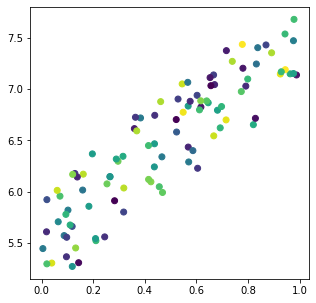

In [13]:
c = np.random.randint(0, 50, 100)
plt.figure(figsize=(5, 5))
plt.scatter(x, y, c=c)
plt.show()

#### 선형 회귀에서는 오차를 나타내는 지표로 MSE(Mean Squared Error) 방식을 활용
모델의 성능이 얼마나 '나쁜가'를 평가하는 함수를 Loss function으로 정의

In [15]:
np.random.seed(0)
x = np.random.rand(100, 1)
y = 5 + 2 * x + np.random.rand(100, 1)
x, y = Variable(x), Variable(y)

W = Variable(np.zeros((1, 1)))
b = Variable(np.zeros(1))

def predict(x):
    y = F.matmul(x, W) + b
    return y

In [16]:
def mean_squared_error(x0, x1):
    diff = x0 - x1
    return F.sum(diff ** 2) / len(diff)

In [17]:
lr = 0.1
iters = 100

for i in range(iters):
    y_pred = predict(x)
    loss = mean_squared_error(y, y_pred)

    W.cleargrad()
    b.cleargrad()
    loss.backward()

    W.data -= lr * W.grad.data
    b.data -= lr * b.grad.data
    print(W, b, loss)

variable([[0.64433458]]) from class's __repr__ variable([1.29473389]) from class's __repr__ variable(42.296340129442335) from class's __repr__
variable([[1.12672345]]) from class's __repr__ variable([2.26959351]) from class's __repr__ variable(23.97380754378544) from class's __repr__
variable([[1.48734571]]) from class's __repr__ variable([3.00386712]) from class's __repr__ variable(13.609686745040522) from class's __repr__
variable([[1.75641886]]) from class's __repr__ variable([3.557186]) from class's __repr__ variable(7.747049961219976) from class's __repr__
variable([[1.95666851]]) from class's __repr__ variable([3.97439789]) from class's __repr__ variable(4.43057410592155) from class's __repr__
variable([[2.10518573]]) from class's __repr__ variable([4.28923203]) from class's __repr__ variable(2.5542803813535926) from class's __repr__
variable([[2.21482401]]) from class's __repr__ variable([4.52705574]) from class's __repr__ variable(1.4925998690471942) from class's __repr__
varia

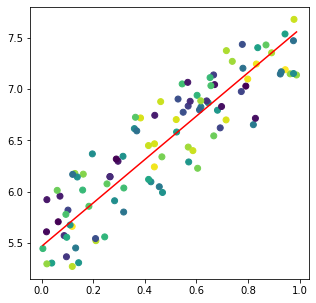

In [42]:
c = np.random.randint(0, 50, 100)
plt.figure(figsize=(5, 5))
plt.scatter(x.data, y.data, c=c)
plt.plot([x.data.min(), x.data.max()], [(x.data.min() * W.data + b.data).reshape(-1), (x.data.max() * W.data + b.data).reshape(-1)], c='red')
plt.show()

#### 현재의 mean_squared_error 함수의 경우 diff, diff ** 2, F.sum(diff ** 2). 이렇게 총 3개의 변수가 추가되는데 이 변수들 모두 메모리를 할당하게 됨
이 메모리 문제를 해결하기 위해 클래스를 구현함

In [ ]:
# myPackage/functions.py
class MeanSquaredError(Function):
    def forward(self, x0, x1):
        diff = x0 - x1
        y = (diff ** 2).sum() / len(diff)
        return y

    def backward(self, gy):
        x0, x1 = self.inputs
        diff = x0 - x1
        gx0 = gy * diff * (2. / len(diff))
        gx1 = -gx0
        return gx0, gx1

def mean_squared_error(x0, x1):
    return MeanSqauredError()(x0, x1)

#### 위와 같이 function을 설정하되 return 값에 class 객체를 호출하면 중간 과정에 대한 메모리 할당 문제가 해결되어 메모리를 덜 사용하게 된다.
정확하게 이야기하면 중간 데이터들은 MeanSquaredError 클래스의 forward 메서드에서만 사용되고 이 변수들은 ndarray 인스턴스로 사용되며 forward 메서드의 범위를 벗어나는 순간 메모리에서 삭제됨

## 신경망

### linear 함수

In [45]:
def linear_simple(x, W, b=None):
    t = matmul(x, W)
    if b is None:
        return t

    y = t + b
    t.data = None
    return y

### 비선형 데이터셋

In [46]:
np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1)

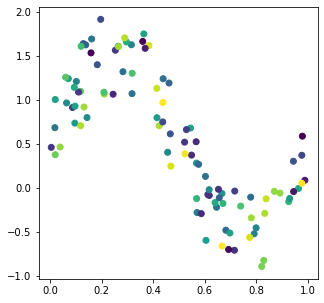

In [48]:
plt.figure(figsize=(5, 5))
plt.scatter(x, y, c=np.random.randint(0, 50, 100))
plt.show()

### 활성화 함수와 신경망

In [49]:
def sigmoid_simple(x):
    x = as_variable(x)
    y = 1 / (1 + exp(-x))
    return y

In [ ]:
def predict(x):
    y = F.linear(x, W1, b1)
    y = F.sigmoid(y)
    y = F.linear(y, W2, b2)
    return y

In [55]:
# 데이터셋
np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1)

# 가중치 초기화
I, H, O = 1, 10, 1
W1 = Variable(0.01 * np.random.randn(I, H))
b1 = Variable(np.zeros(H))
W2 = Variable(0.01 * np.random.randn(H, O))
b2 = Variable(np.zeros(O))

# 신경망 추론
def predict(x):
    y = F.linear(x, W1, b1)
    y = F.sigmoid(y)
    y = F.linear(y, W2, b2)
    return y

lr = 0.2
iters = 10000

# 신경망 학습
for i in range(iters):
    y_pred = predict(x)
    loss = F.mean_squared_error(y, y_pred)

    W1.cleargrad()
    b1.cleargrad()
    W2.cleargrad()
    b2.cleargrad()
    loss.backward()

    W1.data -= lr * W1.grad.data
    b1.data -= lr * b1.grad.data
    W2.data -= lr * W2.grad.data
    b2.data -= lr * b2.grad.data
    if i % 1000 == 0:
        print(loss)

variable(0.8473695850105871) from class's __repr__
variable(0.2514286285183606) from class's __repr__
variable(0.24759485466749875) from class's __repr__
variable(0.2378612044705482) from class's __repr__
variable(0.21222231333102937) from class's __repr__
variable(0.16742181117834185) from class's __repr__
variable(0.0968193261999268) from class's __repr__
variable(0.07849528290602337) from class's __repr__
variable(0.07749729552991154) from class's __repr__
variable(0.07722132399559314) from class's __repr__


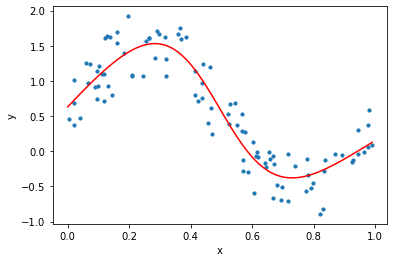

In [102]:
# Plot
plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')
t = np.arange(0, 1, .01)[:, np.newaxis]
y_pred = predict(t)
plt.plot(t, y_pred.data, color='r')
plt.show()

## 매개변수를 모아두는 계층

Parameter 클래스 구현

In [ ]:
# myPackage/core_complex.py
class Parameter(Variable):
    """
    입력 파라미터를 관리하는 클래스
    """
    pass

In [ ]:
# myPackage/layers.py
from myPackage.core_complex import Parameter
import weakref

class Layer:
    """
    Layer class
    -----------
    input, hidden, output layer에 대한 기반클래스

    Args
    ----
    name: Layer's name.
    value: Layer's value is put in name's attritube.
    inputs: This parameter means layer's input data.

    Method
    ------
    __setattr__: Get parameter(name, value) and check a value's type in Parameter instance. Then, set attribute value about name.
    __call__: Make callable function instance with inputs value(get variable argument)(This method use weakref.ref for help to circular reference.).
    forward: It will be necessary method from derived class.
    params: Yield a layer instances value using iterator.
    cleargrad: Clear all value's gradient.
    """
    def __init__(self):
        self._params = set()

    def __setattr__(self, name, value):
        if isinstance(value, Parameter):
            self._params.add(name)
        super().__setattr__(name, value)

    def __call__(self, *inputs):
        outputs = self.forward(*inputs)
        if not isinstance(outputs, tuple):
            outputs = (outputs,)
        self.inputs = [weakref.ref(x) for x in inputs]
        self.outputs = [weakref.ref(y) for y in outputs]
        return outputs if len(outputs) > 1 else outputs[0]

    def forward(self, inputs):
        raise NotImplementedError()

    def params(self):
        for name in self._params:
            yield self.__dict__[name]
        
    def cleargrads(self):
        for param in self.params():
            param.cleargrad()

return의 경우 처리를 종료하고 값을 반환하는 형식.  
yield의 경우 처리를 '일시 중지'하고 값을 반환하는 형식.

In [24]:
test = {1: '123', 2: '234'}

def temp():
    for x, y in test.items():
        yield (x, y)

for i in temp():
    print(i)

(1, '123')
(2, '234')


In [25]:
temptemp = temp()
print(next(temptemp))
print(next(temptemp))

(1, '123')
(2, '234')


In [ ]:
import numpy as np
import myPackage.functions as F
from myPackage.core_complex import Parameter

class Linear(Layer):
    """
    Linear Class
    
    Args
    ----
    in_size, out_size: input array's size, output array's size
    nobias: Flag select to use bias or not.

    Method
    ------
    __init__: Initialize the weight ndarray and set dtype. Then according to nobias config, self.b is decided from config.
    forward: Work linear forward propagation.
    """
    def __init__(self, in_size, out_size, nobias=False, dtype=np.float32):
        super().__init__()

        I, O = in_size, out_size
        W_data = np.random.randn(I, O).astype(dtype) * np.sqrt(1 / I)
        self.W = Parameter(W_data, name='W')
        if nobias:
            self.b = None
        else:
            self.b = Parameter(np.zeros(0, dtype=dtype), name='b')

    def forward(self, x):
        y = F.linear(x, self.W, self.b)
        return y

현재 Linear class의 경우 가중치가 초기화 당시에 결정되도록 설정되어 있으나 이 가중치 W를  새성하는 시점을 늦춰서 입력 크기를 자동으로 결정하도록 설정할 수 있음

In [ ]:
class Linear(Layer):
    """
    Linear Class
    
    Args
    ----
    in_size, out_size: input array's size, output array's size
    nobias: Flag select to use bias or not.

    Method
    ------
    __init__: Set argument from the paramter. Then according to nobias config, self.b is decided from config.
    _init_W: Initialize the weight ndarray and set dtype.
    forward: Work linear forward propagation.
    """
    def __init__(self, out_size, nobias=False, dtype=np.float32, in_size=None):
        super().__init__()
        self.in_size = in_size
        self.out_size = out_size
        self.dtype = dtype

        self.W = Parameter(None, name='W')
        if self.in_size is not None: # in_size가 정의되지 않은 경우 나중으로 연기
            self._init_W()

        if nobias:
            self.b = None
        else:
            self.b = Parameter(np.zeros(out_size, dtype=dtype), name='b')


    def _init_W(self):
        I, O = self.in_size, self.out_size
        W_data = np.random.randn(I, O).astype(self.dtype) * np.sqrt(1 / I)
        self.W.data = W_data


    def forward(self, x):
        # 데이터를 흘려보내는 시점에 가중치를 초기화
        if self.W.data is None:
            self.in_size = x.shape[1]
            self._init_W()

        y = F.linear(x, self.W, self.b)
        return y

## Layer를 이용한 신경망 구현

In [5]:
import numpy as np
from myPackage import Variable
import myPackage.functions as F
import myPackage.layers as L

__file__ in globals at layers.py
__file__ in globals at utils.py
__file__ in globals at models.py


In [12]:
np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1)

l1 = L.Linear(10)
l2 = L.Linear(1)

def predict(x):
    y = l1(x)
    y = F.sigmoid(y)
    y = l2(y)
    return y

lr = 0.2
iters = 10000

for i in range(iters):
    y_pred = predict(x)
    loss = F.mean_squared_error(y, y_pred)

    l1.cleargrads()
    l2.cleargrads()
    loss.backward()

    for l in [l1, l2]:
        for p in l.params():
            p.data -= lr * p.grad.data
    if i % 1000 == 0:
        print(loss)

variable(0.8165178492839196)
variable(0.24990280802148895)
variable(0.24609876581126014)
variable(0.23721590814318072)
variable(0.20793216413350174)
variable(0.12311905720649353)
variable(0.07888166506355153)
variable(0.07655073683421634)
variable(0.07637803086238225)
variable(0.07618764131185568)


## 계층을 모아두는 계층

Layer 클래스 확장

In [ ]:
class Layer:
    def __init__(self):
        self._params = set()

    def __setattr__(self, name, value):
        if isinstance(value, (Parameter, Layer)): # Layer 추가
            self._params.add(name)
        super().__setattr__(name, value)

    def params(self):
        for name in self._params:
            obj = self.__dict__[name]

            if isinstance(obj, Layer): # Layer인 경우 함수를 메서드를 재호출하여 내부 parameter yield
                yield from obj.params()
            else:
                yield obj

yield를 사용한 함수를 제너레이터(generator)라고 하며, 제너레이터를 사용하여 또 다른 제너레이터를 생성하고자 할 때는 yield from을 사용해야 한다.

#### Layer 클래스 상속 후 모델 전체를 하나의 클래스로 정의

In [ ]:
class TwoLayerNet(Layer):
    def __init__(self, hidden_size, out_size):
        super().__init__()
        self.l1 = L.Linear(hidden_size)
        self.l2 = L.Linear(out_size)

    def forward(self, x):
        y = F.sigmoid(self.l1(x))
        y = self.l2(y)
        return y

## Model 클래스

In [ ]:
# myPackage/models.py
from myPackage import Layer
from myPackage import utils

class Model(Layer):
    def plot(self, *inputs, to_file='model.png'):
        y = self.forward(*inputs)
        return utils.plot_dot_graph(y, verbose=True, to_file=to_file)

In [7]:
import numpy as np
import myPackage.layers as L
import myPackage.functions as F
from myPackage import Variable, Model, Layer

np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1)

lr = 0.2
max_iter = 10000
hidden_size = 10

class TwoLayerNet(Layer):
    def __init__(self, hidden_size, out_size):
        super().__init__()
        self.l1 = L.Linear(hidden_size)
        self.l2 = L.Linear(out_size)

    def forward(self, x):
        y = F.sigmoid(self.l1(x))
        y = self.l2(y)
        return y

model = TwoLayerNet(hidden_size, 1)

for i in range(max_iter):
    y_pred = model(x)
    loss = F.mean_squared_error(y, y_pred)
    
    model.cleargrads()
    loss.backward()

    for p in model.params():
        p.data -= lr * p.grad.data
    if i % 1000 == 0:
        print(loss)

variable(0.8165178492839196)
variable(0.24990280802148895)
variable(0.24609876581126014)
variable(0.23721590814318072)
variable(0.20793216413350174)
variable(0.12311905720649353)
variable(0.07888166506355153)
variable(0.07655073683421634)
variable(0.07637803086238225)
variable(0.07618764131185568)


## Optimizer로 수행하는 매개변수 갱신

In [ ]:
class Optimizer:
    """
    Optimizer class
    
    Args
    ----
    target: This is optimized by hooks(func).
    hooks: There is option list including preprocessing params.

    Methods
    -------
    setup: This exists for update target.
    update: This exists for update params.
    """
    def __init__(self):
        self.target = None
        self.hooks = []

    def setup(self, target):
        self.target = target
        return self

    def update(self):
        # None 이외의 매개변수 리스트에 모으기
        params = [p for p in self.target.params() if p.grad is not None]

        # 전처리(옵션)
        for f in self.hooks:
            f(params)

        # 매개변수 갱신
        for param in params:
            self.update_one(param)

    def update_one(self, param):
        raise NotImplementedError()

    def add_hook(self, f):
        self.hooks.append(f)

### SGD 클래스 구현

In [ ]:
class SGD(Optimizer):
    def __init__(self, lr=0.01):
        super().__init__()
        self.lr = lr

    def update_one(self, param):
        param.data -= self.lr * param.grad.data

In [ ]:
class MomentumSGD(Optimizer):
    def __init__(self, lr = 0.01, momentum = 0.9):
        super().__init__()
        self.lr = lr
        self.momentum = momentum
        self.vs = {}

    def update_one(self, param):
        v_key = id(param)
        if v_key not in self.vs:
            self.vs[v_key] = np.zeros_like(param.data)

            v = self.vs[v_key]
            v *= self.momentum
            v -= self.lr * param.grad.data
            param.data += v

## 소프트맥스 & 교차 엔트로피 오차

#### 슬라이스 조작 함수

In [1]:
import numpy as np

a = np.zeros((2, 3))
b = np.ones((3,))
slices = 1

np.add.at(a, slices, b)
print(a)

[[0. 0. 0.]
 [1. 1. 1.]]


In [66]:
import numpy as np

a = np.zeros((2, 3))
b = 1

slices = ([1], [1], [1]), ([0], [1], [2]) # (1, 0), (1, 1), (1, 2) 위치에 add
np.add.at(a, slices, b)
print(a)

a = np.zeros((2, 3))
b = 1

slices = ([1], [0], [0]), ([0], [1], [1]) # (1, 0), (0, 1)*2 위치에 add
np.add.at(a, slices, b)
print(a)

slices = ([1], [0], [0]), ([0], [1], [1]) # (1, 0), (0, 1)*2 위치에 add
np.add.at(a, slices, b)
print(a) # reference 형태로 받아서 바로 반환. (복사 X)

[[0. 0. 0.]
 [1. 1. 1.]]
[[0. 2. 0.]
 [1. 0. 0.]]
[[0. 4. 0.]
 [2. 0. 0.]]


In [67]:
x = Variable(np.array([[1, 2, 3], [4, 5, 6]]))
indices = np.array([0, 0, 1])
y = F.get_item(x, indices)
print(y)

variable([[1 2 3]
          [1 2 3]
          [4 5 6]])


### 소프트맥스 함수

In [ ]:
def softmax1d(x):
    x = as_variable(x)
    y = F.exp(x)
    sum_y = F.sum(y)
    return y / sum_y

In [ ]:
# myPackage/functions.py
def softmax_simple(x, axis=1):
    x = as_variable(x)
    y = exp(x)
    sum_y = sum(y, axis=axis, keepdims=True)
    return y / sum_y

### 교차 엔트로피 오차

In [ ]:
def softmax_cross_entropy_simple(x, t):
    x, t = as_variable(x), as_variable(t)
    N = x.shape[0]
    p = softmax(x)
    p = clip(p, 1e-15, 1.0)  # To avoid log(0)
    log_p = log(p)
    tlog_p = log_p[np.arange(N), t.data]
    y = -1 * sum(tlog_p) / N
    return y

## 다중 클래스 분류

### 스파이럴 데이터셋
spiral: 나선형, 소용돌이 모양

In [10]:
import matplotlib.pyplot